In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split
mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

digits = datasets.load_digits()  # 使用 scikit-learn 自带的 digits 数据集
print(type(digits.data))
print(digits.data.shape, '\n', digits.data[0])
print(digits.target[:35])

<class 'numpy.ndarray'>
(1797, 64) 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                              digits.target, 
                                              test_size=0.25, 
                                              random_state=0,
                                              stratify=digits.target)
print(type(X_train))
print(X_train.shape, '\n', X_train[0])
print(y_train[:5])

<class 'numpy.ndarray'>
(1347, 64) 
 [ 0.  0.  0. 10. 12. 15. 16. 13.  0.  0.  6. 15.  6.  4. 14.  9.  0.  0.
 10.  6.  0.  3. 14.  2.  0.  1. 14.  1.  0. 12.  6.  0.  0.  0.  3.  0.
  5. 13.  0.  0.  0.  0.  0.  1. 13.  3.  0.  0.  0.  0.  0.  6. 13.  0.
  0.  0.  0.  0.  0. 14.  6.  0.  0.  0.]
[7 3 6 6 7]


模型: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=50, random_state=None)
基分类器的个数: 50


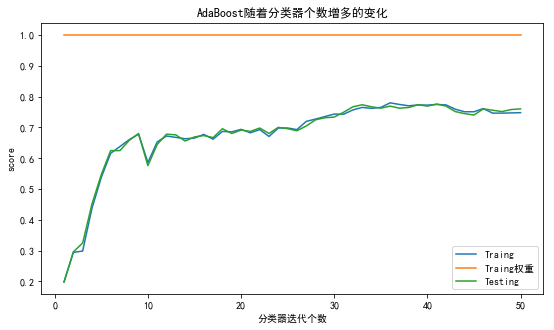

In [57]:
def test_AdaBoostClassifier(X_train, X_test, y_train, y_test):
    clf = ensemble.AdaBoostClassifier(learning_rate=0.1)
    # 默认 n_estimators=50 分类器个数50, 基础分类器是决策树, 学习率为1
    print("模型:", clf)
    clf.fit(X_train, y_train)
    estimators_num = len(clf.estimators_)
    print("基分类器的个数:", estimators_num)
    X = range(1, estimators_num + 1)
    
    ## 绘图
    fig = plt.figure(figsize=(9, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="Traing")
    ax.plot(list(X), list(clf.estimator_weights_), label="Traing权重")
    ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="Testing")
    ax.set_xlabel("分类器迭代个数")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoost随着分类器个数增多的变化")
    plt.show()
    
test_AdaBoostClassifier(X_train, X_test, y_train, y_test)

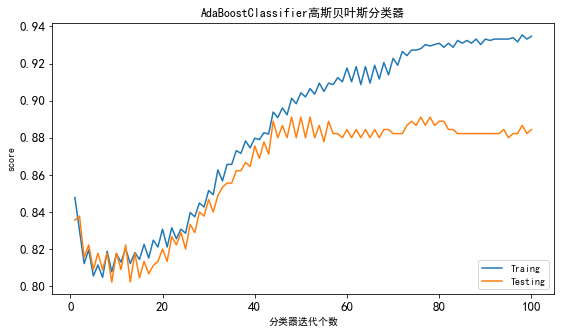

In [46]:
from sklearn.naive_bayes import GaussianNB
def AdaBoost_GaussianNB_classifier(X_train, X_test, y_train, y_test):
    # Gaussian Naive Bayes 个体分类器 
    clf = ensemble.AdaBoostClassifier(learning_rate=0.1, 
                                      n_estimators=100, 
                                      base_estimator=GaussianNB())
    clf.fit(X_train, y_train)
    
    ## 绘图
    fig = plt.figure(figsize=(9, 5))
    ax = fig.add_subplot(1, 1, 1)
    estimators_num = len(clf.estimators_)
    X = range(1, estimators_num + 1)
    ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="Traing")
    ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="Testing")
    ax.set_xlabel("分类器迭代个数")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_title("AdaBoostClassifier高斯贝叶斯分类器")
    plt.tick_params(labelsize=13)
    plt.show()
    
AdaBoost_GaussianNB_classifier(X_train, X_test, y_train, y_test)

E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


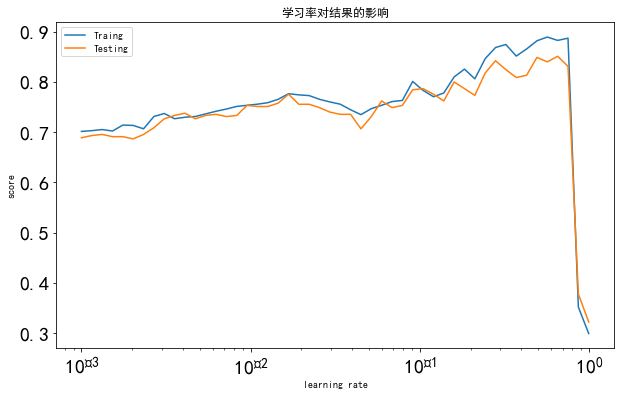

E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
E:\software\anaconda3\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


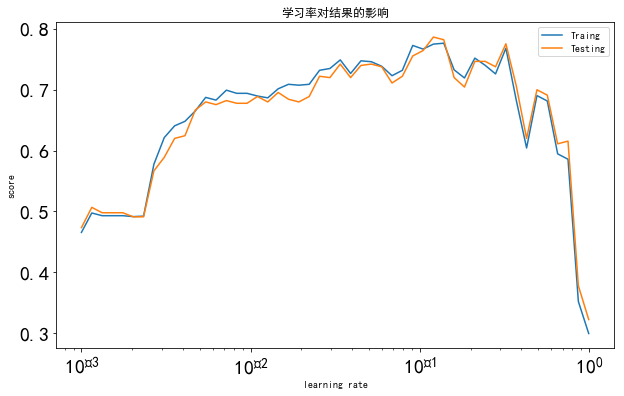

In [52]:
def test_AdaBoostClassifier_learning_rate(X_train, X_test, y_train, y_test):
    learning_rates = np.logspace(-3, 0)
    traing_scores = []
    testing_scores = []
    for learning_rate in learning_rates:
        clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate, 
                                          n_estimators=500)
        clf.fit(X_train, y_train)
        traing_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(learning_rates, traing_scores, label="Traing")
    ax.plot(learning_rates, testing_scores, label="Testing")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("学习率对结果的影响")
    # 设置对数坐标
    ax.set_xscale('log')
    plt.tick_params(labelsize=20)
    plt.show()
    
    traing_scores = []
    testing_scores = []
    for learning_rate in learning_rates:
        clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate)
        clf.fit(X_train, y_train)
        traing_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(learning_rates, traing_scores, label="Traing")
    ax.plot(learning_rates, testing_scores, label="Testing")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("学习率对结果的影响")
    # 设置对数坐标
    ax.set_xscale('log')
    plt.tick_params(labelsize=20)
    plt.show()
    
test_AdaBoostClassifier_learning_rate(X_train, X_test, y_train, y_test)

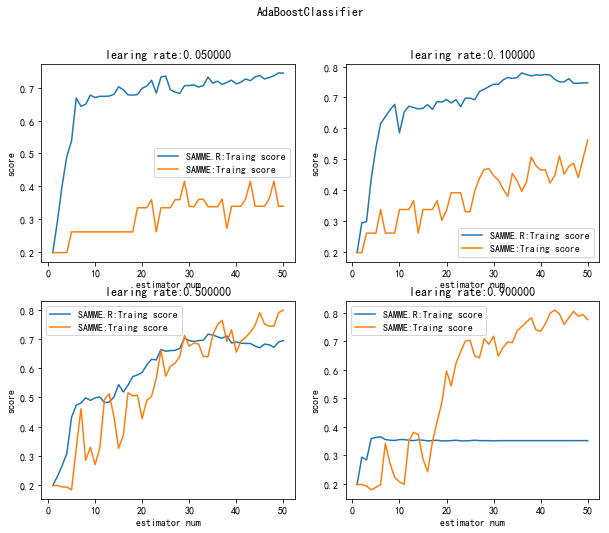

In [54]:
def test_AdaBoostClassifier_algorithm(X_train, X_test, y_train, y_test):
    algorithms = ['SAMME.R', 'SAMME']
    fig = plt.figure(figsize=(10, 8))
    learning_rates = [0.05, 0.1, 0.5, 0.9]
    
    for i, learning_rate in enumerate(learning_rates):
        ax = fig.add_subplot(2, 2, i + 1)
        for i, algorithm in enumerate(algorithms):
            clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate,
                                              algorithm=algorithm)
            clf.fit(X_train, y_train)
            # 绘图
            estimators_num = len(clf.estimators_)
            X = range(1, estimators_num + 1)
            ax.plot(list(X), list(clf.staged_score(X_train, y_train)),
                    label="%s:Traing score" % algorithms[i])
#             ax.plot(list(X), list(clf.staged_score(X_test, y_test)),
#                     label="%s:Testing score" % algorithms[i])
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="best")
        ax.set_title("learing rate:%f" % learning_rate)
    fig.suptitle("AdaBoostClassifier")
    plt.show()

test_AdaBoostClassifier_algorithm(X_train,X_test,y_train,y_test)